In [2]:
%load_ext autoreload
%autoreload 2
import cv2

participant_number = '3'
video_path = f"./datasets/MIT/Videos/P{participant_number}.avi"


cap = cv2.VideoCapture(video_path)

In [3]:
from models.frame import Frame
from typing import List
import random

frames: List[Frame] = []
cap = cv2.VideoCapture(video_path)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(Frame(len(frames), participant_number, frame))
cap.release()
num_selected_frames = 20
frames_selection = random.sample(frames, num_selected_frames)

# Face

In [4]:
from utils.face_analyzer import FaceAnalyzer

face_analyzer = FaceAnalyzer()
for frame in frames_selection:
    frame.face = face_analyzer.get_face(frame.image)

# Smile

In [5]:
for frame in frames_selection:
    frame.smile = face_analyzer.get_smile(frame.image, frame.face) if frame.face is not None else None

# Facial Interest Points

In [6]:
for frame in frames_selection:
    frame.facial_landmarks = face_analyzer.get_face_interest_points(frame)

# Selected Facial Features

In [7]:
for frame in frames_selection:
    if frame.facial_landmarks:
        frame.selected_facial_landmarks = face_analyzer.get_selected_facial_features(frame.facial_landmarks)

# Display Frames

(np.float64(36.75644414708694), np.float64(-20.280823920725094), np.float64(-13.624424023524707))


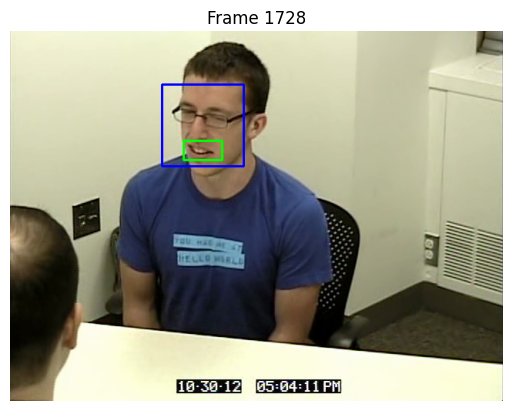

(np.float64(80.61954334062887), np.float64(64.76918615100223), np.float64(-84.85177032263113))


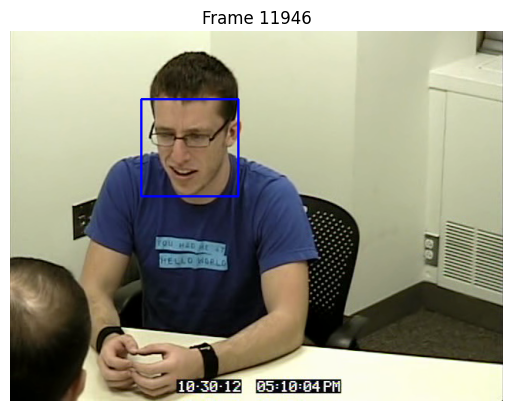

(np.float64(90.91330595338056), np.float64(66.71333457328208), np.float64(-77.56845767109522))


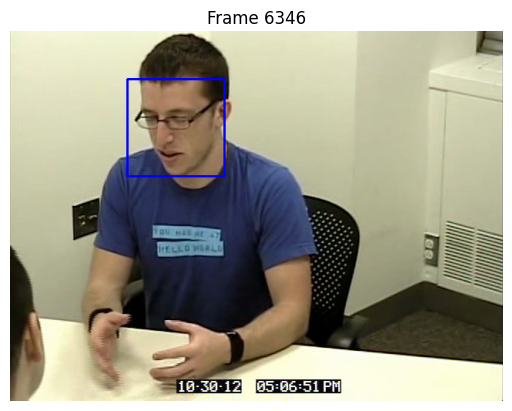

(0.0, 0.0, 0.0)


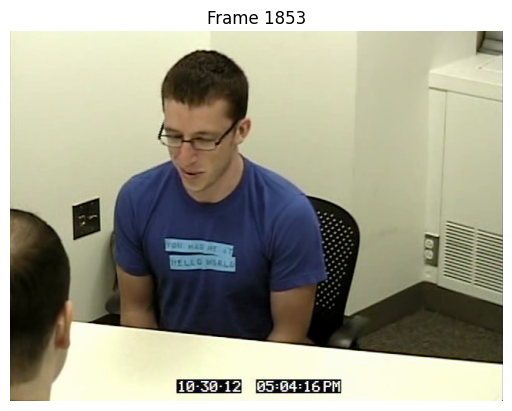

(np.float64(79.4452208678128), np.float64(62.6350367579967), np.float64(-82.89546592419423))


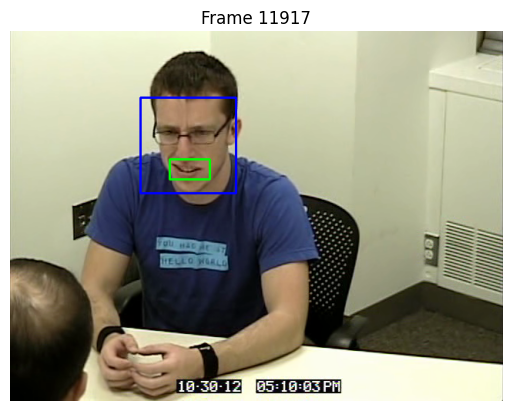

(np.float64(68.0414632020526), np.float64(65.46957009711753), np.float64(-96.52288300715989))


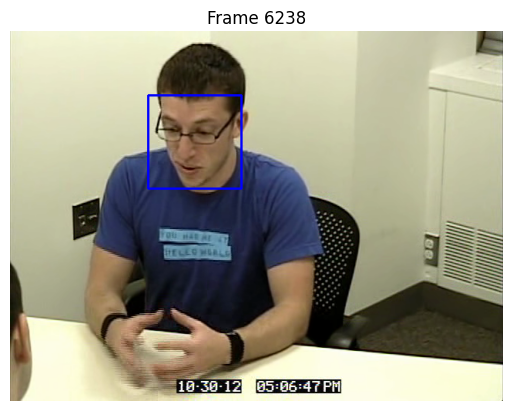

(0.0, 0.0, 0.0)


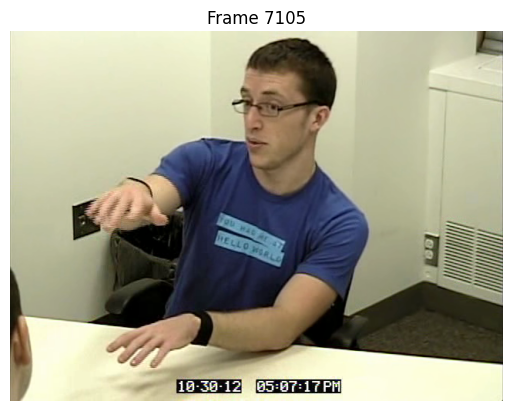

(np.float64(172.37174908035706), np.float64(14.153322585649722), np.float64(7.325058738591031))


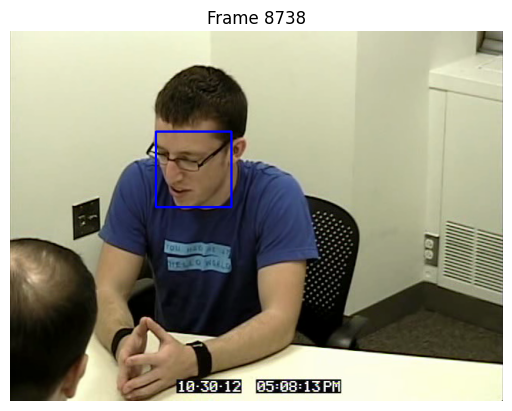

(np.float64(45.08893972590231), np.float64(65.77498007430944), np.float64(-126.5731561849362))


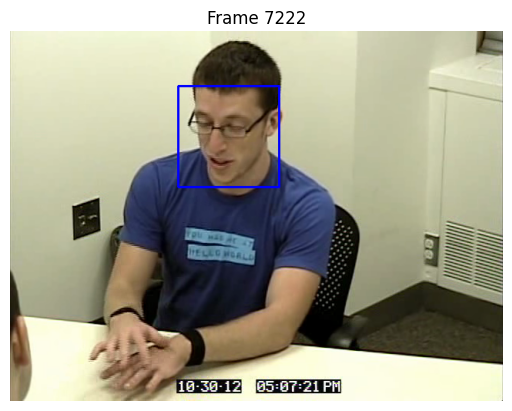

(np.float64(52.858864333553896), np.float64(60.77985544776811), np.float64(-113.29624115346888))


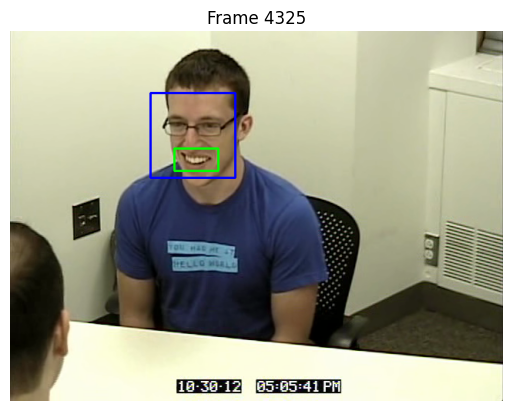

(0.0, 0.0, 0.0)


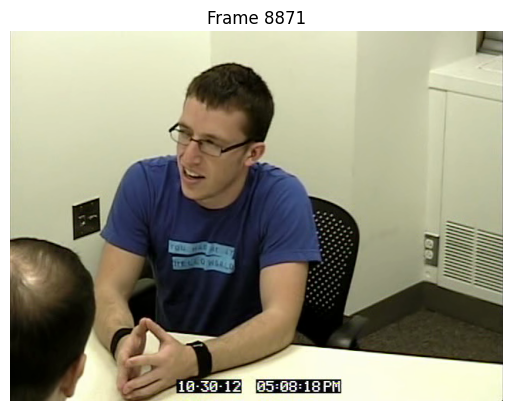

(np.float64(37.800308814146796), np.float64(58.30101447145645), np.float64(-130.1777770845947))


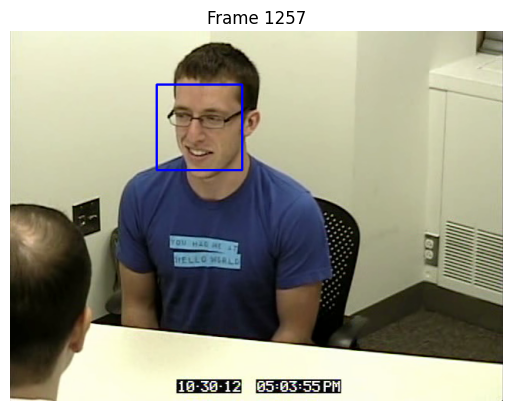

(np.float64(48.08193526744992), np.float64(56.610406196009336), np.float64(-115.32567662920023))


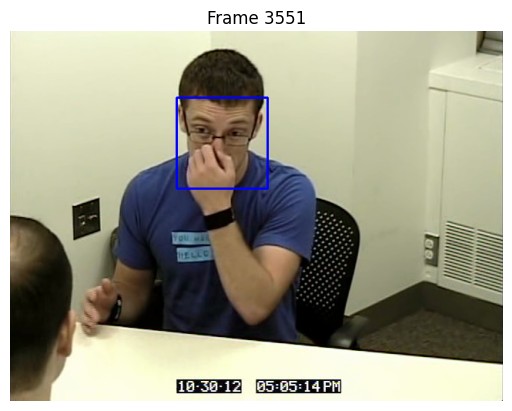

(np.float64(110.40009405204329), np.float64(67.74523501626469), np.float64(-58.12896909873143))


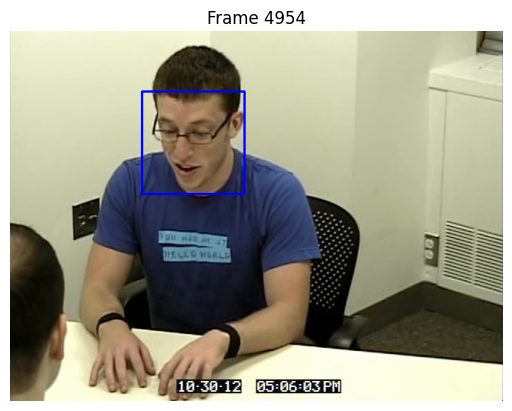

(np.float64(38.556021691890436), np.float64(70.42872517232728), np.float64(-132.56728434173874))


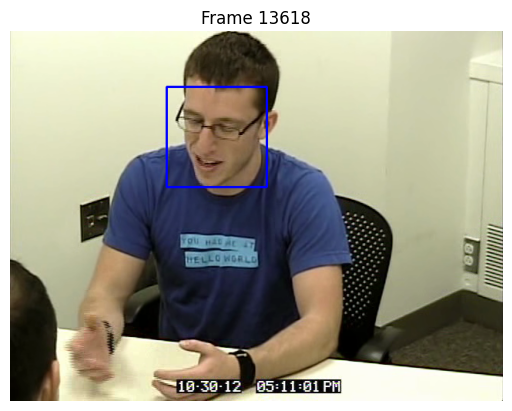

(np.float64(47.877419987911885), np.float64(61.72054854038182), np.float64(-118.0973590011025))


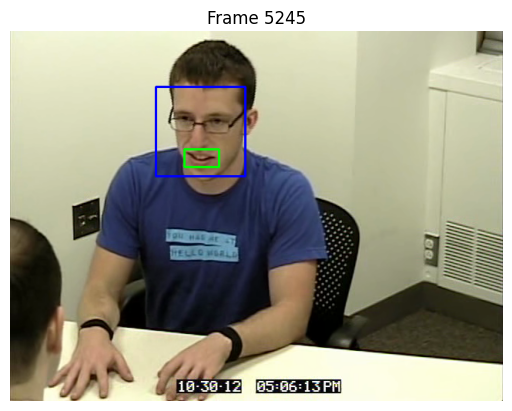

(np.float64(-45.27754167788021), np.float64(64.26633703011333), np.float64(142.37472850757374))


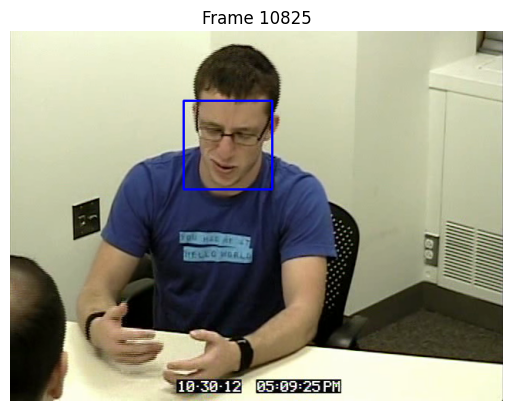

(np.float64(171.39553658361305), np.float64(19.582624195856532), np.float64(4.752745678970105))


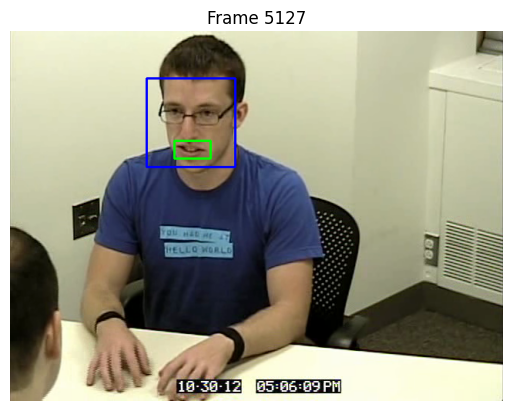

(0.0, 0.0, 0.0)


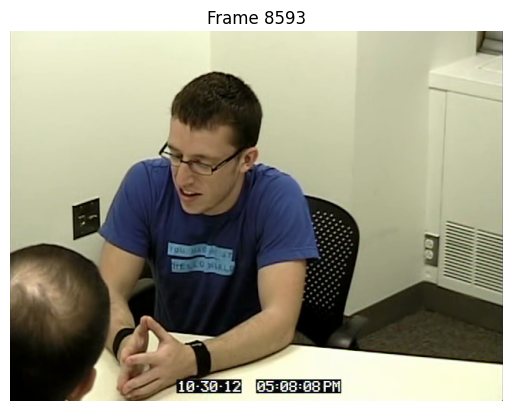

(np.float64(61.0312742252616), np.float64(62.41554974278254), np.float64(-101.5542765208))


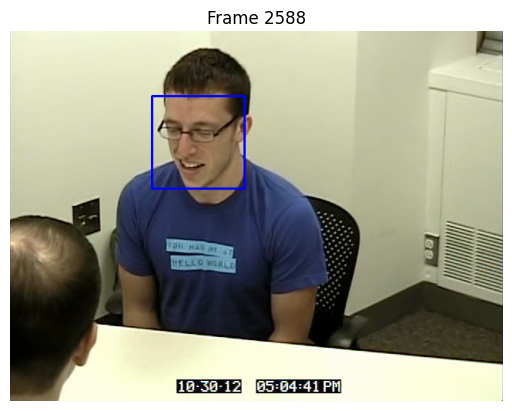

In [8]:
for frame in frames_selection:
    lol = face_analyzer.get_head_pose(frame)
    print(lol)
    frame.reset_drawable_image()
    frame.draw_face()
    frame.draw_smile()
    # frame.draw_selected_facial_landmarks()
    # frame.draw_facial_landmarks()
    frame.display()